In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
sns.set_style('whitegrid')

# 1. Loading the data

In [2]:
#Loading the data
train = pd.read_csv('train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# check the missing data
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
#Loading the test data
test = pd.read_csv('test.csv')
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# 2. Data visualization

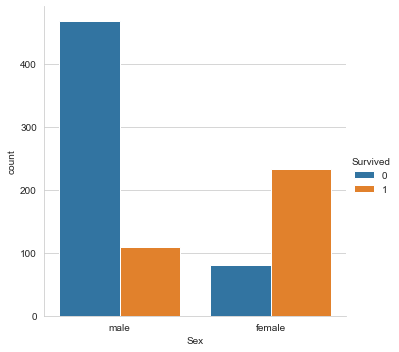

In [5]:
# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

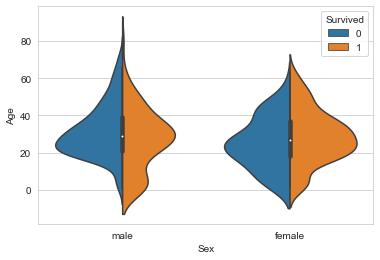

In [6]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train, split = True)

C:\Users\HBK\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HBK\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


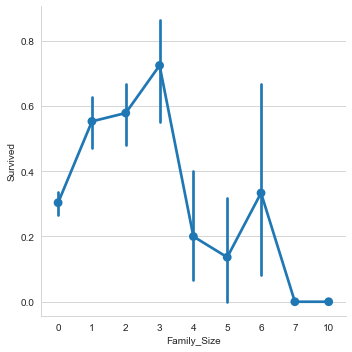

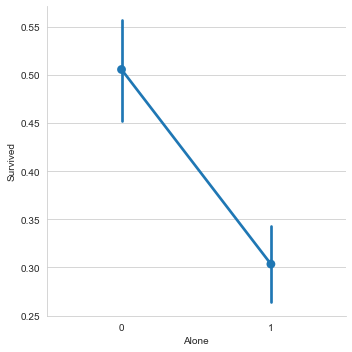

In [7]:
# Adding a column Family_Size
train['Family_Size'] = 0
train['Family_Size'] = train['Parch']+train['SibSp']
 
# Adding a column Alone
train['Alone'] = 0
train.loc[train.Family_Size == 0, 'Alone'] = 1
 
# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = train)
 
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = train)

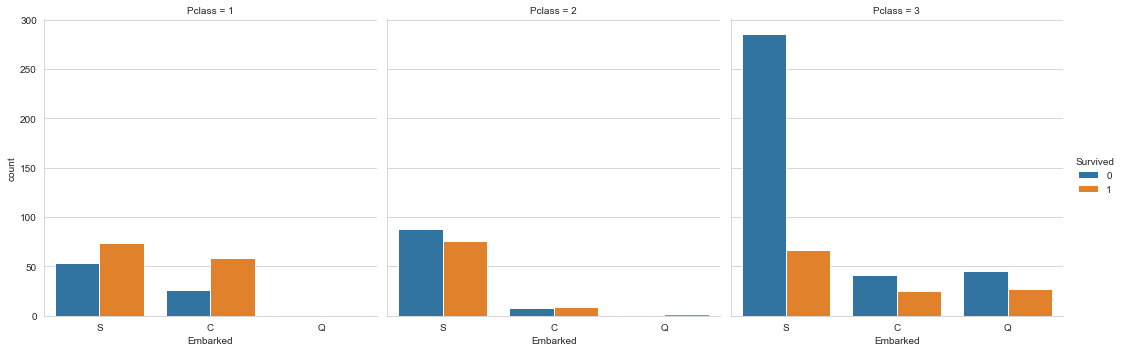

In [8]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = train)


# 3. Features selection

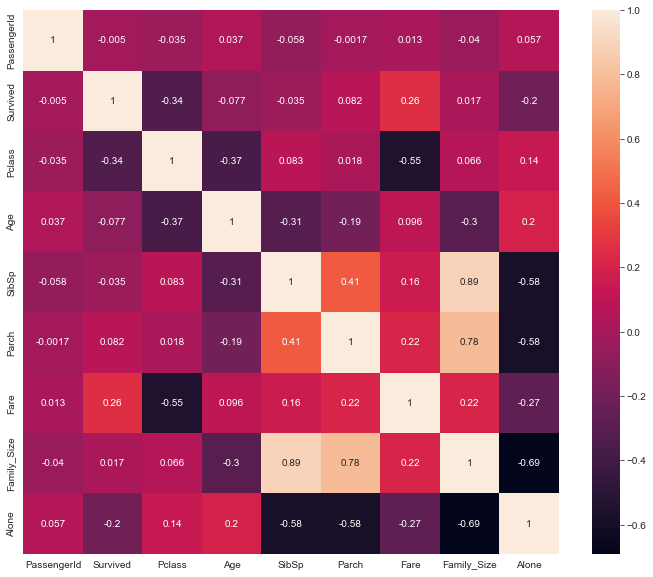

In [9]:
#Using Pearson Correlation
def compute_correlations_matrix_with_seaborn_visualization(data):
    cor=data.corr()
    plt.subplots(figsize=(12,10))
    sns.heatmap(cor,annot=True)
compute_correlations_matrix_with_seaborn_visualization(train)

In [10]:
#Correlation with output variable
def compute_correlations_price_ratio(dataset):
    correlations = dataset.corr()
    res = correlations["Survived"].abs().sort_values(ascending=False)
    print(res)
compute_correlations_price_ratio(train)

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Alone          0.203367
Parch          0.081629
Age            0.077221
SibSp          0.035322
Family_Size    0.016639
PassengerId    0.005007
Name: Survived, dtype: float64


In [11]:
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [12]:
train_data = train.drop(columns=['Name', 'PassengerId', 'Ticket', 'Family_Size', 'Cabin', 'Alone'], axis = 1)
test_data = test.drop(columns=['Name', 'Ticket', 'Cabin'], axis = 1)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,1


In [14]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [15]:
datasets = [train_data, test_data]

## Data normalization

In [16]:
for dataset in datasets:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [17]:
for data in datasets:
    data['Embarked'] = data['Embarked'].str.replace('S', '0')
    data['Embarked'] = data['Embarked'].str.replace('C', '1')
    data['Embarked'] = data['Embarked'].str.replace('Q', '2')
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].median())
    data['Embarked'] = data['Embarked'].astype("Int64", errors='ignore')

In [18]:
for dataset in datasets:
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype("Int64")

In [19]:
for dataset in datasets:    
    dataset['Age'] = dataset['Age'].astype(float)
    dataset['Age'] = dataset['Age'].fillna(data['Age'].median())
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,0,1,0,0,0
1,1,1,1,0,1,0,3,1
2,1,3,1,0,0,0,1,0
3,1,1,1,0,1,0,3,0
4,0,3,0,0,0,0,1,0
5,0,3,0,0,0,0,1,2
6,0,1,0,0,0,0,3,0
7,0,3,0,0,3,1,2,0
8,1,3,1,0,0,2,1,0
9,1,2,1,0,1,0,2,1


In [20]:
var_1 = 0
var_2 = 0
for i in train_data.Survived:
  if i == 1:
    var_1 += 1
  elif i == 0:
    var_2 += 1
  live = var_1 / (var_1 + var_2) * 100
  dead  = var_2 / (var_1 + var_2) * 100
print(f"Survived: {live}%")
print(f"dead: {dead}%")

Survived: 38.38383838383838%
dead: 61.61616161616161%


In [21]:
#Correlation with output variable
def compute_correlations_price_ratio(dataset):
    correlations = train_data.corr()
    res = correlations["Survived"].abs().sort_values(ascending=False)
    print(res)
compute_correlations_price_ratio(train)

Survived    1.000000
Sex         0.543351
Pclass      0.338481
Fare        0.295875
Parch       0.081629
Age         0.064138
SibSp       0.035322
Name: Survived, dtype: float64


In [22]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()
models = {"KNeighborsClassifier":KNeighborsClassifier(n_neighbors = 3), "RandomForestClassifier":RandomForestClassifier(), 
            "DecisionTreeClassifierr":DecisionTreeClassifier()}
print("Models accuracy:")
for key, model in models.items():
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print(f"{key}: {round(model.score(X_train, Y_train) * 100)}%")

Models accuracy:
KNeighborsClassifier: 79%
RandomForestClassifier: 86%
DecisionTreeClassifierr: 86%
